In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf
import plotly.express as plx
import plotly.graph_objects as go

In [39]:

dataset = pd.read_csv("./dataset/student-por.csv",sep=";")
mathset = pd.read_csv("./dataset/student-mat.csv",sep=";")
mathset.head()
dataset["M1"] = mathset["G1"]
dataset["M2"] = mathset["G2"]
dataset["M3"] = mathset["G3"]
dataset["MPaid"] = mathset["paid"]
dataset.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,M1,M2,M3,MPaid
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,5,4,10,11,10,NaN,NaN,NaN,NaN
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,4,15,15,16,NaN,NaN,NaN,NaN
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,5,6,11,12,9,NaN,NaN,NaN,NaN
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,6,10,10,10,NaN,NaN,NaN,NaN
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,4,10,11,11,NaN,NaN,NaN,NaN


In [36]:
def convertToNumeric(column : pd.DataFrame, attributes : list[str]):
    for i in range(column.size):
        for k in range(len(attributes)):
            if attributes[k] == column[i]:
                column[i] = k
                pass
            pass
        pass
    pass

In [37]:
numeric = dataset.copy(deep=True)
convertToNumeric(numeric["school"], ["GP","MS"])
convertToNumeric(numeric["sex"], ["F","M"])
convertToNumeric(numeric["address"], ["U","R"])
convertToNumeric(numeric["famsize"], ["LE3","GT3"])
convertToNumeric(numeric["Pstatus"], ["A","T"])
convertToNumeric(numeric["Mjob"],["teacher","health","services","at_home","other"])
convertToNumeric(numeric["Fjob"],["teacher","health","services","at_home","other"])
convertToNumeric(numeric["reason"],["home","reputation","course","other"])
convertToNumeric(numeric["guardian"],["mother","father","other"])
numeric["Language"] = (numeric["G1"] + numeric["G2"] + numeric["G3"])/3
numeric["Math"] = (numeric["M1"] + numeric["M2"] + numeric["M3"])/3
numeric.tail()


/tmp/ipykernel_52170/3725644536.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1,G2,G3,M1,M2,M3,MPaid,Language,Math
644,1,0,19,1,1,1,2,3,2,4,...,4,10,11,10,NaN,NaN,NaN,NaN,10.333333,NaN
645,1,0,18,0,0,1,3,1,0,2,...,4,15,15,16,NaN,NaN,NaN,NaN,15.333333,NaN
646,1,0,18,0,1,1,1,1,4,4,...,6,11,12,9,NaN,NaN,NaN,NaN,10.666667,NaN
647,1,1,17,0,0,1,3,1,2,2,...,6,10,10,10,NaN,NaN,NaN,NaN,10.000000,NaN
648,1,1,18,1,0,1,3,2,2,4,...,4,10,11,11,NaN,NaN,NaN,NaN,10.666667,NaN


(array([423.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 226.]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <BarContainer object of 10 artists>)

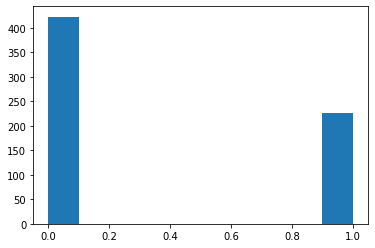

In [5]:
plt.hist(numeric["school"])

(array([112., 177., 179.,   0., 140.,  32.,   0.,   6.,   2.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <BarContainer object of 10 artists>)

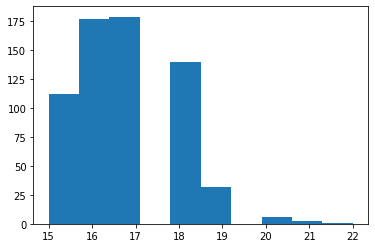

In [6]:
plt.hist(numeric["age"])

In [7]:
plx.histogram(numeric["G1"], facet_col=numeric["age"])

In [8]:
plx.histogram(numeric,numeric["G1"])

In [9]:
plx.histogram(numeric["G1"], facet_col= numeric["famsize"], facet_row=numeric["sex"])

In [10]:
plx.histogram(numeric["Language"], facet_col=numeric["famsize"])

In [11]:
plx.histogram(numeric["Math"], facet_col=numeric["famsize"])

In [12]:
plx.histogram(numeric["address"],nbins=3)

In [33]:
plx.histogram(numeric["M1"],facet_col=numeric["school"])

In [14]:
plx.histogram(numeric["Math"],facet_col=numeric["Fedu"])

In [15]:
plx.histogram(numeric["Math"],facet_col=numeric["Medu"])

In [16]:
plx.histogram(numeric["Language"],facet_col=numeric["Fedu"],facet_row=numeric["Medu"].sort_values())

In [28]:
corr = numeric.corr()

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

In [30]:
numeric["school"]

0      0
1      0
2      0
3      0
4      0
      ..
644    1
645    1
646    1
647    1
648    1
Name: school, Length: 649, dtype: object